# The Markowitz Portfolio Optimization Model and the Efficient Frontier

In [2]:
import numpy as np
import pandas as pd

import datetime as dt
import pandas_datareader.data as web

import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

### Global Industry Classification Standard (GICS®)

1. ***Energy Sector*** - comprises companies engaged in exploration & production, refining & marketing, and storage & transportation of oil & gas and coal & consumable fuels. It also includes companies that offer oil & gas equipment and services.

2. ***Materials Sector*** - includes companies that manufacture chemicals, construction materials, glass, paper, forest products and related packaging products, and metals, minerals and mining companies, including producers of steel.

3. ***Industrials Sector*** - includes manufacturers and distributors of capital goods such as aerospace & defense, building products, electrical equipment and machinery and companies that offer construction & engineering services. It also includes providers of commercial & professional services including printing, environmental and facilities services, office services & supplies, security & alarm services, human resource & employment services, research & consulting services. It also includes companies that provide transportation services.

4. ***Consumer Discretionary Sector*** - encompasses those businesses that tend to be the most sensitive to economic cycles. Its manufacturing segment includes automotive, household durable goods, leisure equipment and textiles & apparel. The services segment includes hotels, restaurants and other leisure facilities, media production and services, and consumer retailing and services.

5. ***Consumer Staples Sector*** - comprises companies whose businesses are less sensitive to economic cycles. It includes manufacturers and distributors of food, beverages and tobacco and producers of non-durable household goods and personal products. It also includes food & drug retailing companies as well as hypermarkets and consumer super centers.

6. ***Health Care Sector*** - includes health care providers & services, companies that manufacture and distribute health care equipment & supplies, and health care technology companies. It also includes companies involved in the research, development, production and marketing of pharmaceuticals and biotechnology products.

7. ***Financials Sector*** - contains companies involved in banking, thrifts & mortgage finance, specialized finance, consumer finance, asset management and custody banks, investment banking and brokerage and insurance. It also includes Financial Exchanges & Data and Mortgage REITs.

8. ***Information Technology Sector*** - comprises companies that offer software and information technology services, manufacturers and distributors of technology hardware & equipment such as communications equipment, cellular phones, computers & peripherals, electronic equipment and related instruments, and semiconductors.

9. ***Communication Services Sector*** - includes companies that facilitate communication and offer related content and information through various mediums. It includes telecom and media & entertainment companies including producers of interactive gaming products and companies engaged in content and information creation or distribution through proprietary platforms.

10. ***Utilities Sector*** - comprises utility companies such as electric, gas and water utilities. It also includes independent power producers & energy traders and companies that engage in generation and distribution of electricity using renewable sources.

11. ***Real Estate Sector*** - contains companies engaged in real estate development and operation. It also includes companies offering real estate related services and Equity Real Estate Investment Trusts (REITs).

#### Selected ETFs - Vanguard

1. ***Energy*** - VDE
2. ***Materials*** - VAW
3. ***Industrials*** - VIS
4. ***Consumer Discretionary*** - VCR
5. ***Consumer Staples*** - VDC
6. ***Health Care*** - VHT
7. ***Financials*** - VFH
8. ***Information Technology*** - VGT
9. ***Communication Services*** - VOX
10. ***Utilities*** - VPU
11. ***Real Estate*** - VNQ

In [3]:
start = dt.datetime(2015, 1, 1)
end = dt.datetime(2019, 12, 31)

#ticker_list = ['KO','FB','XOM','GS']
ticker_list= ['VDE','VAW', 'VIS', 'VCR', 'VDC',
              'VHT', 'VFH', 'VGT', 'VOX', 'VPU', 'VNQ']

returns = pd.DataFrame()
for ticker in ticker_list:
    returns['RET_'+ticker] = \
    np.log(1+(web.DataReader(ticker,'yahoo',start,end)\
              ['Adj Close'].pct_change()))

In [4]:
returns.head()

,RET_VDE,RET_VAW,RET_VIS,RET_VCR,RET_VDC,RET_VHT,RET_VFH,RET_VGT,RET_VOX,RET_VPU,RET_VNQ
Date,,,,,,,,,,,
2015-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-01-05,-0.040477,-0.028715,-0.023341,-0.018899,-0.008228,-0.004937,-0.018062,-0.017321,-0.014720,-0.013598,0.005458
2015-01-06,-0.015152,-0.009019,-0.013239,-0.010873,-0.000810,-0.004802,-0.013816,-0.012968,-0.008406,0.000591,0.009870
2015-01-07,0.002447,0.007011,0.005820,0.016572,0.016322,0.023702,0.010534,0.008860,0.005532,0.010575,0.015215
2015-01-08,0.021392,0.023363,0.019347,0.014407,0.015275,0.017242,0.013470,0.022292,0.013698,0.007762,0.003768


In [5]:
returns_mon = pd.DataFrame()
for ticker in ticker_list:
    returns_mon[ticker] = returns['RET_'+ticker].\
    resample(rule = 'BM').sum()
returns_mon.head()

,VDE,VAW,VIS,VCR,VDC,VHT,VFH,VGT,VOX,VPU,VNQ
Date,,,,,,,,,,,
2015-01-30,-0.054781,-0.030818,-0.037845,-0.023128,-0.008390,0.014433,-0.057111,-0.033458,-0.020837,0.016001,0.051324
2015-02-27,0.047893,0.074668,0.059645,0.079159,0.041884,0.045238,0.049439,0.080035,0.064080,-0.061217,-0.037434
2015-03-31,-0.019304,-0.036453,-0.015070,-0.000898,-0.013531,0.014120,0.000309,-0.024940,-0.024678,-0.006884,0.017170
2015-04-30,0.068175,0.023130,-0.006261,-0.004911,-0.011484,-0.020049,-0.003252,0.012779,0.036235,-0.006420,-0.060254
2015-05-29,-0.052108,0.005028,0.003742,0.014256,0.011641,0.051286,0.016556,0.024627,-0.018465,0.003733,-0.003028


In [6]:
returns_mon.tail()

,VDE,VAW,VIS,VCR,VDC,VHT,VFH,VGT,VOX,VPU,VNQ
Date,,,,,,,,,,,
2019-08-30,-0.091173,-0.038772,-0.031457,-0.017511,0.015832,-0.011837,-0.053002,-0.022181,-0.028165,0.047192,0.036777
2019-09-30,0.038082,0.034730,0.030475,0.013308,0.018948,-0.007933,0.046734,0.013126,-0.002637,0.040037,0.019088
2019-10-31,-0.026627,0.003949,0.013667,0.007081,-0.004609,0.046721,0.020223,0.036845,0.029548,-0.008669,0.011197
2019-11-29,0.010736,0.031650,0.041988,0.018461,0.014461,0.059492,0.048237,0.054430,0.031416,-0.020001,-0.013129
2019-12-31,0.069007,0.029225,0.000872,0.029157,0.026014,0.031679,0.023563,0.038907,0.022207,0.030679,0.007661


In [5]:
ff_factors = pd.read_csv('ff_factors19.csv', 
                         usecols = ['dateff','rf'],
                       index_col = 'dateff',
                       parse_dates = True)
ff_factors.index.name = 'Date'
ff_factors.tail()

,rf
Date,
2019-08-30,0.0016
2019-09-30,0.0018
2019-10-31,0.0015
2019-11-29,0.0012
2019-12-31,0.0014


In [6]:
ff_factors = ff_factors['01/01/2015':]

In [7]:
ff_factors.head()

,rf
Date,
2015-01-30,0.0
2015-02-27,0.0
2015-03-31,0.0
2015-04-30,0.0
2015-05-29,0.0


## Method 1. Portfolio Optimization using Monte Carlo Simulation

### A Single Run of the Simulation

In [78]:
np.random.seed(1000)

# Portfolio Stocks
print('These are the stocks in the portfolio:')
print(returns_mon.columns,'\n')

# Generating an array of N (number of stocks) random numbers
# from the Standard Normal/Uniform distribution
print('These are the random weights:')
#weights = np.random.uniform(0,1,len(returns_mon.columns))
weights = np.random.uniform(-1,1,len(returns_mon.columns))
print(weights,'\n')

# Standardizing the weights, such that they add up to 1
weights = weights/np.sum(weights)
print('These are the standardized random weights:')
print(weights,'\n')

# Portfolio Return
port_ret = np.dot(returns_mon, weights).mean()*12
print('This is the portfolio return:')
print(port_ret,'\n')

# Portfolio Standard Deviation
print('This is the portfolio standard deviation:')
port_std = np.sqrt(np.dot(weights, np.dot(returns_mon.cov()*12, weights)))
print(port_std,'\n')

# Excess Portfolio Return
ex_port_ret = (np.dot(returns_mon, weights)-ff_factors['rf']).mean()*12
print('This is the excess portfolio return:')
print(ex_port_ret,'\n')

# Excess Portfolio Standard Deviation
print('This is the excess portfolio standard deviation:')
ex_port_std = (np.dot(returns_mon, weights)-ff_factors['rf']).std()*np.sqrt(12)
print(ex_port_std,'\n')

# Sharpe Ratio
print('This is the portfolio Sharpe Ratio:')
SR = ex_port_ret/ex_port_std
print(SR)

These are the stocks in the portfolio:
Index(['VDE', 'VAW', 'VIS', 'VCR', 'VDC', 'VHT', 'VFH', 'VGT', 'VOX', 'VPU',
       'VNQ'],
      dtype='object') 

These are the random weights:
[ 0.30717917 -0.76998611  0.90056573 -0.0356172   0.74494907 -0.57533464
 -0.91858075 -0.20561108 -0.53373561  0.68348145 -0.58583531] 

These are the standardized random weights:
[-0.31074488  0.77892405 -0.91101943  0.03603064 -0.75359638  0.58201308
  0.92924356  0.20799779  0.53993117 -0.69141525  0.59263564] 

This is the portfolio return:
0.11321520845689467 

This is the portfolio standard deviation:
0.23918208985621994 

This is the excess portfolio return:
0.10337520845689464 

This is the excess portfolio standard deviation:
0.23925579268895458 

This is the portfolio Sharpe Ratio:
0.4320698249144922


### Running the Simulation (10,000 times)

In [79]:
np.random.seed(1000)

# Number of simulations
num_sim = 10000

weights_mat = np.zeros((num_sim,len(returns_mon.columns)))
port_ret_arr = np.zeros(num_sim)
port_std_arr = np.zeros(num_sim)
ex_port_ret_arr = np.zeros(num_sim)
ex_port_std_arr = np.zeros(num_sim)
SR_arr = np.zeros(num_sim)

for index in range(num_sim):
    
    # Generating an array of 11 random numbers from the Uniform distribution
    #weights = np.random.uniform(0,1,len(returns_mon.columns))
    weights = np.random.uniform(-1,1,len(returns_mon.columns))
    
    # Standardizing the weights, such that they add up to 1
    weights = weights/np.sum(weights)
    
    # Saving the weights
    weights_mat[index,:] = weights
    
    # Portfolio Return
    port_ret_arr[index] = np.dot(returns_mon,weights).mean()*12
    
    # Portfolio Standard Deviation
    port_std_arr[index] = np.sqrt(np.dot(weights,np.dot(returns_mon.cov()*12, weights)))

    # Excess Portfolio Return
    ex_port_ret_arr[index] = (np.dot(returns_mon,weights)-ff_factors['rf']).mean()*12
    
    # Excess Portfolio Standard Deviation
    ex_port_std_arr[index] = (np.dot(returns_mon,weights)-ff_factors['rf']).std()*np.sqrt(12)
    
    # Sharpe Ratio
    SR_arr[index] = ex_port_ret_arr[index]/ex_port_std_arr[index]

In [80]:
# The maximum Sharpe Ratio
SR_arr.max()

1.495611977707139

In [81]:
# The index for the maximum Sharpe Ratio
SR_arr.argmax()

1302

In [82]:
# The stock weights for the maximum Sharpe Ratio
weights_mat[SR_arr.argmax()]

array([-0.35488428, -0.76022826,  0.22024171,  0.43169793, -1.02154225,
        0.17917461,  0.50359034,  0.6842302 ,  0.55185093,  0.90752002,
       -0.34165095])

In [83]:
# The return of the portfolio with the maximum Sharpe Ratio
port_ret_arr[SR_arr.argmax()]

0.2423564611585339

In [84]:
# The standard deviation of the portfolio with the maximum Sharpe Ratio
port_std_arr[SR_arr.argmax()]

0.15563545895756817

In [85]:
# The return of the Global Minimum Variance Portfolio
port_ret_arr[port_std_arr.argmin()]

0.07594640687963045

In [86]:
#The standard deviation of the Global Minimum Variance Portfolio
port_std_arr.min()

0.09264932115934964

In [87]:
#The stock weights for the Global Minimum Variance Portfolio
weights_mat[port_std_arr.argmin()]

array([ 0.02239948,  0.03580718, -0.13659171,  0.0756994 ,  0.24173597,
        0.19158272,  0.18800307, -0.0653581 ,  0.25581632,  0.25900138,
       -0.0680957 ])

## Method 2. Portfolio Optimization using Mathematical Function Optimization

We will be maximizing the functional form of the Sharpe Ratio (or, specifically, minimize the negative of the Sharpe Ratio), by using the SciPy minimizing function.

In [88]:
from scipy.optimize import minimize

In [89]:
#help(minimize)

In [90]:
# Define the portfolio returns function
def port_ret(weights):
    port_ret = np.dot(returns_mon*12,weights).mean()
    return port_ret

# Define the portfolio standard deviation function
def port_std(weights):
    port_std = np.sqrt(np.dot(weights, np.dot(returns_mon.cov()*12, weights)))
    return port_std

# Define the excess portfolio returns function
def ex_port_ret(weights):
    ex_port_ret = (np.dot(returns_mon,weights) - ff_factors['rf']).mean()*12
    return ex_port_ret

# Define the excess portfolio standard deviation function
def ex_port_std(weights):
    ex_port_std = (np.dot(returns_mon,weights) - ff_factors['rf']).std()*np.sqrt(12)
    return ex_port_std

# Define the negative Sharpe Ratio function that we will minimize
def neg_SR(weights):
    SR = ex_port_ret(weights) / ex_port_std(weights)
    return (-1)*SR

# By convention of minimize function it should be a function
# that returns zero for conditions
constraints = ({'type':'eq','fun': lambda weights: np.sum(weights) - 1})

# Weights must be between 0 and 1
boundaries=[(0,1)]
bounds = tuple(boundaries * len(returns_mon.columns))

# Initial Guess (equally weighted)
init_guess = np.full(len(returns_mon.columns),
                     1/len(returns_mon.columns))

# Use the SLSQP (Sequential Least Squares Programming) for minimization
optimal_port = minimize(neg_SR,
                        init_guess,
                        method='SLSQP',
                        #bounds = bounds,
                        constraints=constraints)

In [91]:
optimal_port

     fun: -1.6456595439819448
     jac: array([-0.06802294, -0.06885016, -0.06819834, -0.06832221, -0.06812027,
       -0.06837368, -0.06858879, -0.06842448, -0.06842798, -0.06855142,
       -0.06811205])
 message: 'Optimization terminated successfully.'
    nfev: 235
     nit: 18
    njev: 18
  status: 0
 success: True
       x: array([-0.37133482, -0.36717409, -0.07618581,  0.42826185, -0.28471915,
        0.21039805,  0.44540011,  0.55672195,  0.01230518,  0.91052584,
       -0.46419912])

In [92]:
# Maximum Sharpe Ratio
-optimal_port.fun

1.6456595439819448

In [93]:
# Weights of the Maximum Sharpe Ratio portfolio
for ticker in ticker_list:
    print(ticker + "  "+ str(round(optimal_port.x[ticker_list.index(ticker)],4)))

VDE  -0.3713
VAW  -0.3672
VIS  -0.0762
VCR  0.4283
VDC  -0.2847
VHT  0.2104
VFH  0.4454
VGT  0.5567
VOX  0.0123
VPU  0.9105
VNQ  -0.4642


In [94]:
# Return of the portfolio with the Maximum Sharpe Ratio
port_ret(optimal_port.x)

0.2373386344051266

In [95]:
# Standard Deviation of the portfolio with the Maximum Sharpe Ratio
port_std(optimal_port.x)

0.1384663383447385

### Global Minimum Variance Portfolio Closed Solution

In [96]:
# Return of the GMVP
gmvp_ret = np.dot(12*returns_mon.mean(),
                  np.dot(np.linalg.inv(returns_mon.cov()*12),
                         np.ones(len(returns_mon.columns))))/\
np.dot(np.ones(len(returns_mon.columns)),
       np.dot(np.linalg.inv(returns_mon.cov()*12),
              np.ones(len(returns_mon.columns))))

gmvp_ret

0.09501545936965876

In [97]:
# Standard Deviation of the GMVP
gmvp_std = 1/np.sqrt(np.dot(np.ones(len(returns_mon.columns)),
                            np.dot(np.linalg.inv(returns_mon.cov()*12),
                                   np.ones(len(returns_mon.columns)))))

gmvp_std

0.08483439030232848

In [98]:
# Weights of the stocks in GMVP
gmvp_weights = np.dot(np.linalg.inv(returns_mon.cov()*12),
                      np.ones(len(returns_mon.columns)))/\
np.dot(np.ones(len(returns_mon.columns)),
       np.dot(np.linalg.inv(returns_mon.cov()*12),
              np.ones(len(returns_mon.columns))))

gmvp_weights

array([-0.0226944 ,  0.00693093, -0.18325256,  0.10963055,  0.14069572,
        0.22412954,  0.26310467, -0.08212927,  0.16761727,  0.62150062,
       -0.24553308])

## The Efficient Frontier

We will create the efficient frontier by minimizing the portfolio standard deviation for a range of portfolio returns.

In [109]:
# Create an array of equally-spaced numbers that will represent our portfolio returns
frontier_y = np.arange(gmvp_ret,port_ret(optimal_port.x)+port_ret(optimal_port.x)*1.5,0.01)

In [110]:
frontier_x = []

for ret in frontier_y:
    constraints = ({'type':'eq','fun': lambda weights: np.sum(weights) - 1},
                {'type':'eq','fun': lambda weights: port_ret(weights) - ret})
    
    init_guess = np.full(len(returns_mon.columns),
                     1/len(returns_mon.columns))
    
    boundaries=[(0,1)]
    bounds = tuple(boundaries * len(returns_mon.columns))
    
    result = minimize(port_std,
                      init_guess,
                      method='SLSQP',
                      #bounds=bounds,
                      constraints=constraints)
    
    frontier_x.append(result.fun)

frontier_x=np.array(frontier_x)

In [111]:
frontier_x

array([0.08483798, 0.08518625, 0.08622126, 0.08791904, 0.09024283,
       0.09314608, 0.09657456, 0.10047569, 0.10479523, 0.10948498,
       0.11450083, 0.11980022, 0.12534776, 0.13111172, 0.13706449,
       0.14318282, 0.14944596, 0.15583737, 0.16234073, 0.16894421,
       0.17563604, 0.1824065 , 0.18924711, 0.19615067, 0.20311067,
       0.21012182, 0.21717837, 0.22427762, 0.23141362, 0.2385841 ,
       0.24578597, 0.25301656, 0.26027348, 0.26755457, 0.27485793,
       0.28218182, 0.28952468, 0.29688521, 0.30426089, 0.31165278,
       0.31905842, 0.32647719, 0.33390852, 0.34135139, 0.34880451,
       0.35626806, 0.36374104, 0.37122288, 0.37871307, 0.38621151])

In [112]:
frontier_y

array([0.09501546, 0.10501546, 0.11501546, 0.12501546, 0.13501546,
       0.14501546, 0.15501546, 0.16501546, 0.17501546, 0.18501546,
       0.19501546, 0.20501546, 0.21501546, 0.22501546, 0.23501546,
       0.24501546, 0.25501546, 0.26501546, 0.27501546, 0.28501546,
       0.29501546, 0.30501546, 0.31501546, 0.32501546, 0.33501546,
       0.34501546, 0.35501546, 0.36501546, 0.37501546, 0.38501546,
       0.39501546, 0.40501546, 0.41501546, 0.42501546, 0.43501546,
       0.44501546, 0.45501546, 0.46501546, 0.47501546, 0.48501546,
       0.49501546, 0.50501546, 0.51501546, 0.52501546, 0.53501546,
       0.54501546, 0.55501546, 0.56501546, 0.57501546, 0.58501546])

## Plotting the data

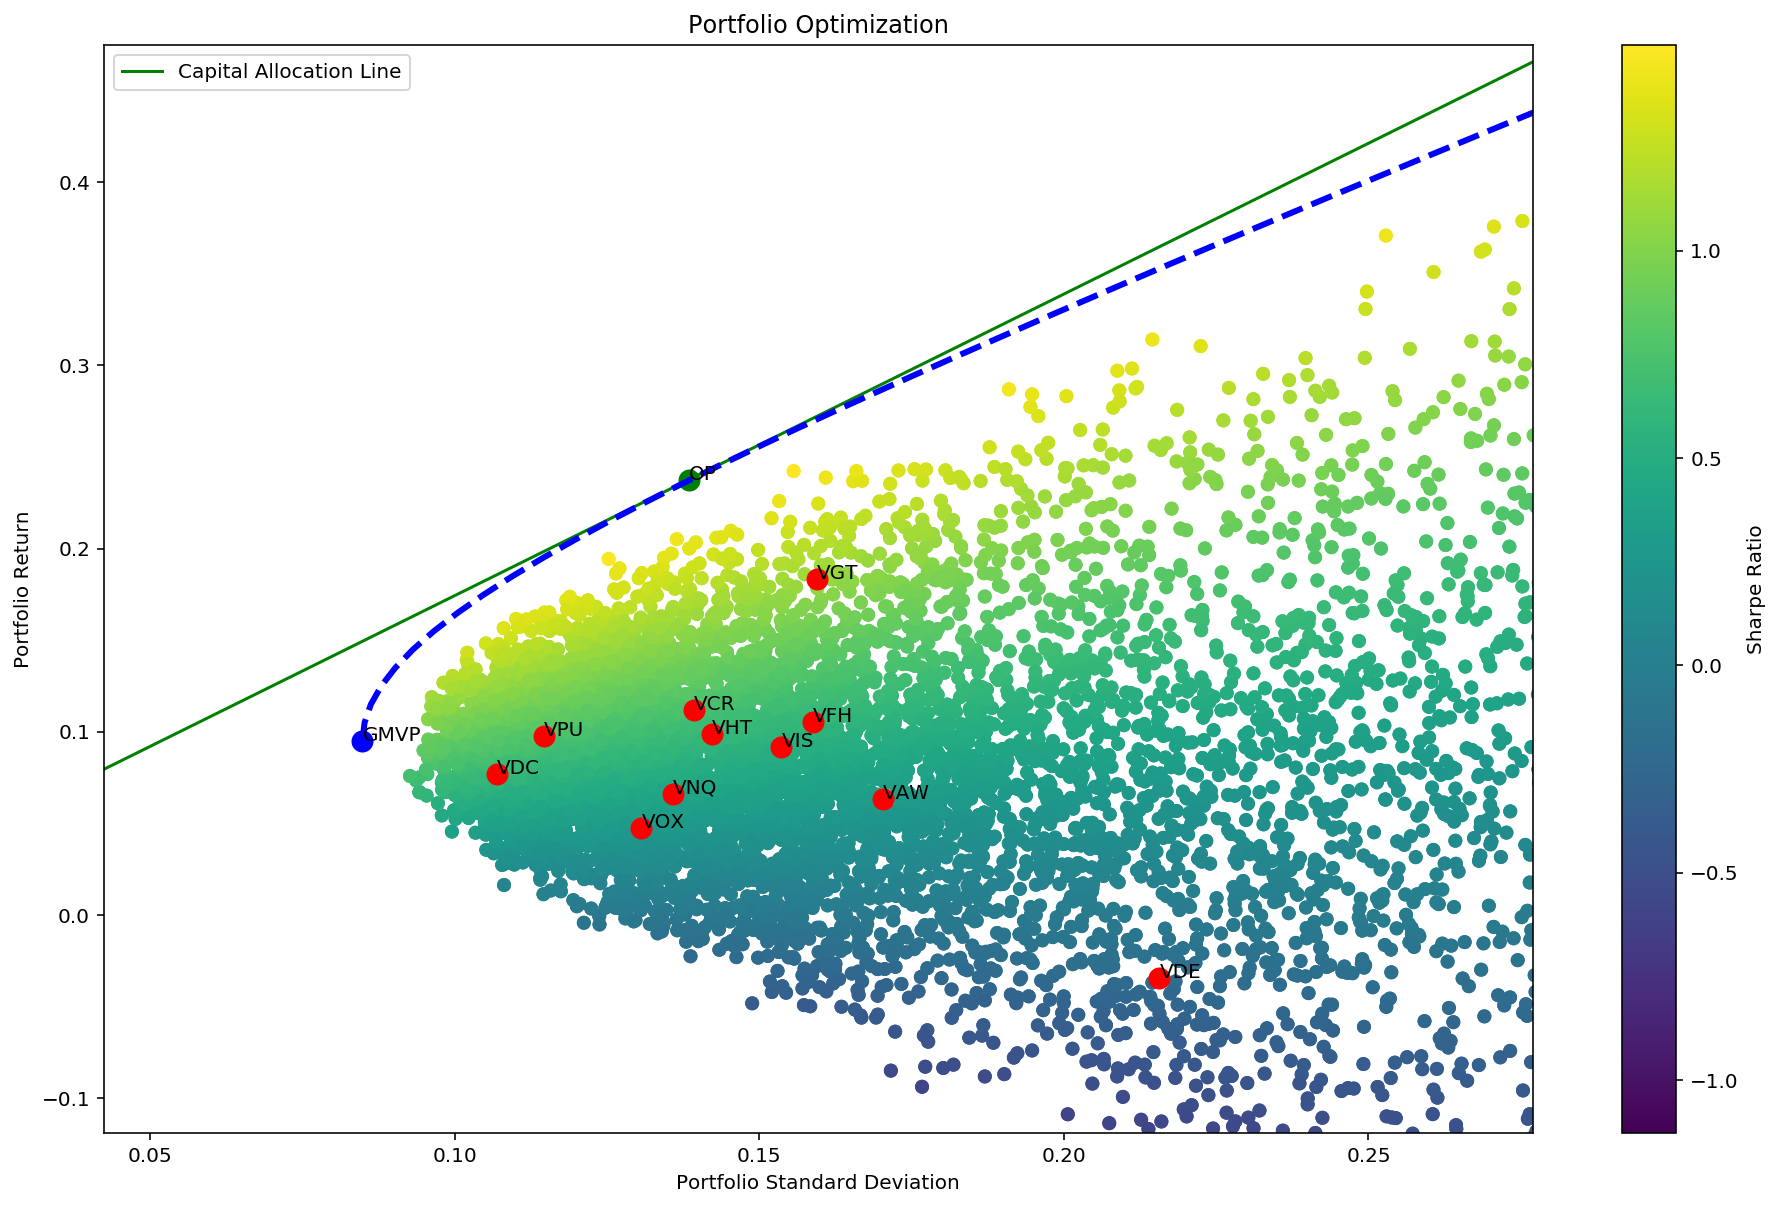

In [113]:
# Create figure, with a size of 16 by 10 inches
fig = plt.figure(figsize = (16,10))

# Add one subplot
ax = fig.add_subplot()

# Plot the data and add a colorbar figure
ax.scatter(port_std_arr,port_ret_arr,c=SR_arr)
fig.colorbar(ax.scatter(port_std_arr,port_ret_arr,c=SR_arr),
             ax=ax,label='Sharpe Ratio')

# Add limits to the axes
ax.set_xlim(gmvp_std*0.5,port_std(optimal_port.x)*2)
ax.set_ylim(-port_ret(optimal_port.x)*0.5,port_ret(optimal_port.x)*2)

# Add a green dot for the portfolio with the maximum Sharpe Ratio (Optimal Risky Portfolio)
ax.scatter(port_std(optimal_port.x),port_ret(optimal_port.x),color='green',s=100)
ax.annotate('OP',(port_std(optimal_port.x),port_ret(optimal_port.x)))

# Add a blue dot for the portfolio with the minimum variance (Global Mimimum Variance Portfolio)
ax.scatter(gmvp_std,gmvp_ret,color='blue',s=100)
ax.annotate('GMVP',(gmvp_std,gmvp_ret))

# Draw the Capital Allocation Line (CAL)
ax.plot(np.arange(0.0,frontier_x[-1],0.01),
        (ff_factors['rf'].mean()*12)+(-optimal_port.fun)*np.arange(0.0,frontier_x[-1],0.01),
        color='green',
       label = 'Capital Allocation Line')

# Annotate the stocks on the plot
for ticker in ticker_list:
    ax.annotate(ticker,(returns_mon[ticker].std()*np.sqrt(12),
                        returns_mon[ticker].mean()*12))
    ax.scatter(returns_mon[ticker].std()*np.sqrt(12),
               returns_mon[ticker].mean()*12,color='red',s=100)
    
# Add frontier line
plt.plot(frontier_x,frontier_y,color = 'blue', linestyle='--',linewidth=3)

# Add title to the plot
ax.set_title('Portfolio Optimization')

# Add axis labels
ax.set_xlabel('Portfolio Standard Deviation')
ax.set_ylabel('Portfolio Return');

# Add legend to the graph
ax.legend(loc = 'best');